# Where to take my talents to - a world happiness analysis


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx

In [184]:
y2015 = pd.read_csv("Data/2015.csv")
y2016 = pd.read_csv("Data/2016.csv")
y2017 = pd.read_csv("Data/2017.csv")
y2018 = pd.read_csv("Data/2018.csv")
y2019 = pd.read_csv("Data/2019.csv")
y2020 = pd.read_csv("Data/2020.csv")

## Preprocessing 

In [185]:
# COLUMNS IMPORTANTS 
cols=['Year','Country','Happiness_Score','Happiness_Rank', 'GDP_per_capita', 'Healthy_life_expectancy','Freedom', 'Generosity','Perceptions_of_corruption']

In [188]:
y2015.rename(columns={'Economy (GDP per Capita)':'GDP_per_capita', \
                      'Happiness Score':'Happiness_Score',\
                      'Happiness Rank':'Happiness_Rank',\
                       'Health (Life Expectancy)':'Healthy_life_expectancy',\
                     'Trust (Government Corruption)':'Perceptions_of_corruption'}, inplace=True)
y2015['Year']=2015
y2015=y2015.loc[:,cols]

In [190]:
y2016.rename(columns={'Economy (GDP per Capita)':'GDP_per_capita', \
                     'Happiness Score':'Happiness_Score',\
                      'Happiness Rank':'Happiness_Rank',\
                       'Health (Life Expectancy)':'Healthy_life_expectancy',\
                     'Trust (Government Corruption)':'Perceptions_of_corruption'}, inplace=True)
y2016['Year']=2016
y2016=y2016.loc[:,cols]

In [191]:
y2017.rename(columns={'Economy..GDP.per.Capita.':'GDP_per_capita', \
                       'Health..Life.Expectancy.':'Healthy_life_expectancy',\
                     'Trust..Government.Corruption.':'Perceptions_of_corruption',\
                     'Happiness.Rank': 'Happiness_Rank',\
                     'Happiness.Score': 'Happiness_Score'}, inplace=True)
y2017['Year']=2017
y2017=y2017.loc[:,cols]

In [194]:
y2018.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Overall rank': 'Happiness_Rank',\
                      'Country or region':'Country',\
                      'GDP per capita':'GDP_per_capita',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Score': 'Happiness_Score'}, inplace=True)
y2018['Year']=2018
y2018=y2018.loc[:,cols]

In [196]:
y2019.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Overall rank': 'Happiness_Rank',\
                      'Country or region':'Country',\
                      'GDP per capita':'GDP_per_capita',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Score': 'Happiness_Score'}, inplace=True)
y2019['Year']=2019
y2019=y2019.loc[:,cols]

In [198]:
y2020.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Logged GDP per capita':'GDP_per_capita', \
                      'Country name': 'Country',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Ladder score': 'Happiness_Score'}, inplace=True)
y2020['Happiness_Rank'] = y2020['Happiness_Score'].rank(ascending=False)
y2020['Year']=2020
y2020=y2020.loc[:,cols]

In [199]:
df = pd.concat([y2015, y2016, y2017, y2018, y2019, y2020], axis=0)
df

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.5870,1.0,1.396510,0.941430,0.665570,0.296780,0.419780
1,2015,Iceland,7.5610,2.0,1.302320,0.947840,0.628770,0.436300,0.141450
2,2015,Denmark,7.5270,3.0,1.325480,0.874640,0.649380,0.341390,0.483570
3,2015,Norway,7.5220,4.0,1.459000,0.885210,0.669730,0.346990,0.365030
4,2015,Canada,7.4270,5.0,1.326290,0.905630,0.632970,0.458110,0.329570
...,...,...,...,...,...,...,...,...,...
148,2020,Central African Republic,3.4759,149.0,6.625160,45.200001,0.640881,0.082410,0.891807
149,2020,Rwanda,3.3123,150.0,7.600104,61.098846,0.900589,0.055484,0.183541
150,2020,Zimbabwe,3.2992,151.0,7.865712,55.617260,0.711458,-0.072064,0.810237
151,2020,South Sudan,2.8166,152.0,7.425360,51.000000,0.451314,0.016519,0.763417


In [200]:
df.loc[df['Country']=="Switzerland"]

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.5870,1.0,1.396510,0.941430,0.665570,0.296780,0.419780
1,2016,Switzerland,7.5090,2.0,1.527330,0.863030,0.585570,0.280830,0.412030
3,2017,Switzerland,7.4940,4.0,1.564980,0.858131,0.620071,0.290549,0.367007
4,2018,Switzerland,7.4870,5.0,1.420000,0.927000,0.660000,0.256000,0.357000
5,2019,Switzerland,7.4800,6.0,1.452000,1.052000,0.572000,0.263000,0.343000
2,2020,Switzerland,7.5599,3.0,10.979933,74.102448,0.921337,0.105911,0.303728


### MATCHING 

First we calculate the median of GPD per capita and then we create a dummy variable, indicating with 1 the countries that have a GPD greater than the median, and with 0 the countries with a GPD lower than the median

In [202]:
y2020_matching = y2020.copy()
median = y2020_matching['GDP_per_capita'].median()
median
y2020_matching['treatment']= np.where(y2020_matching['GDP_per_capita']>median, 1,0)
y2020_matching

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,treatment
0,2020,Finland,7.8087,1.0,10.639267,71.900825,0.949172,-0.059482,0.195445,1
1,2020,Denmark,7.6456,2.0,10.774001,72.402504,0.951444,0.066202,0.168489,1
2,2020,Switzerland,7.5599,3.0,10.979933,74.102448,0.921337,0.105911,0.303728,1
3,2020,Iceland,7.5045,4.0,10.772559,73.000000,0.948892,0.246944,0.711710,1
4,2020,Norway,7.4880,5.0,11.087804,73.200783,0.955750,0.134533,0.263218,1
...,...,...,...,...,...,...,...,...,...,...
148,2020,Central African Republic,3.4759,149.0,6.625160,45.200001,0.640881,0.082410,0.891807,0
149,2020,Rwanda,3.3123,150.0,7.600104,61.098846,0.900589,0.055484,0.183541,0
150,2020,Zimbabwe,3.2992,151.0,7.865712,55.617260,0.711458,-0.072064,0.810237,0
151,2020,South Sudan,2.8166,152.0,7.425360,51.000000,0.451314,0.016519,0.763417,0


For each characteristic of the dataset we will compare the control group with the treatment group

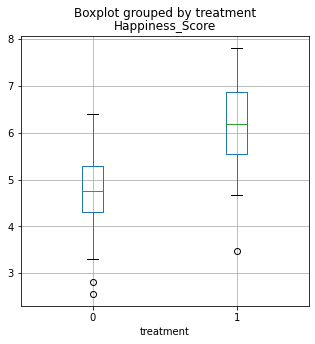

In [203]:
#Happiness Score
y2020_matching.boxplot(by='treatment', column='Happiness_Score', figsize = [5, 5], grid=True)
plt.show()

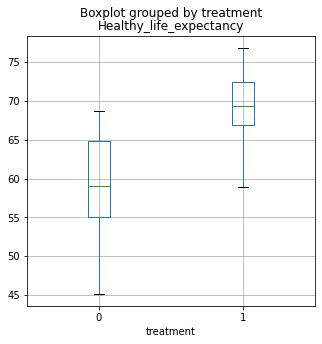

In [204]:
# Healthy life expectancy
y2020_matching.boxplot(by='treatment', column='Healthy_life_expectancy', figsize = [5, 5], grid=True)
plt.show()

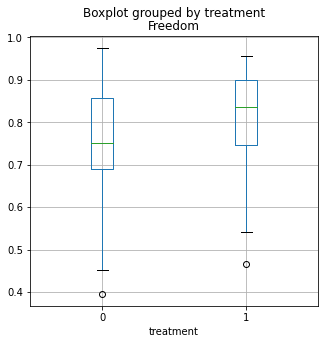

In [205]:
#Freedom
y2020_matching.boxplot(by='treatment', column='Freedom', figsize = [5, 5], grid=True)
plt.show()

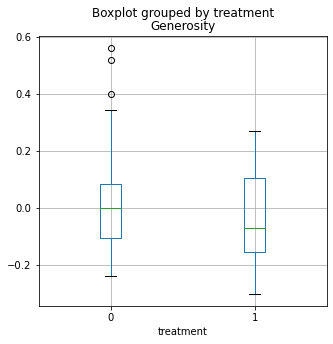

In [206]:
#Generosity
y2020_matching.boxplot(by='treatment', column='Generosity', figsize = [5, 5], grid=True)
plt.show()

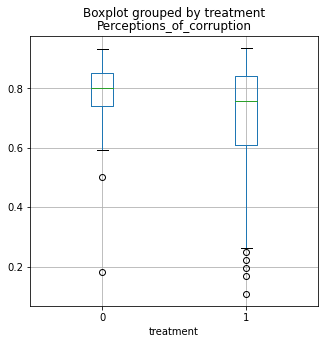

In [207]:
#Perceptions of corruption
y2020_matching.boxplot(by='treatment', column='Perceptions_of_corruption', figsize = [5, 5], grid=True)
plt.show()

### Propensity score model

In [208]:
# let's standardize the continuous features
y2020_matching['Healthy life expectancy'] = (y2020_matching['Healthy_life_expectancy'] - y2020_matching['Healthy_life_expectancy'].mean())/y2020_matching['Healthy_life_expectancy'].std()
y2020_matching['Freedom'] = (y2020_matching['Freedom'] - y2020_matching['Freedom'].mean())/y2020_matching['Freedom'].std()
y2020_matching['Generosity'] = (y2020_matching['Generosity'] - y2020_matching['Generosity'].mean())/y2020_matching['Generosity'].std()
y2020_matching['Perceptions of corruption'] = (y2020_matching['Perceptions_of_corruption'] - y2020_matching['Perceptions_of_corruption'].mean())/y2020_matching['Perceptions_of_corruption'].std()

mod = smf.logit(formula='treatment ~ Healthy_life_expectancy + Freedom + Generosity + Perceptions_of_corruption ', data=y2020_matching)

res = mod.fit()

# # Extract the estimated propensity scores
y2020_matching['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.349780
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                  153
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:                  0.4954
Time:                        22:24:45   Log-Likelihood:                -53.516
converged:                       True   LL-Null:                       -106.05
Covariance Type:            nonrobust   LLR p-value:                 8.209e-22
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -25.1238      5.011     -5.013      0.000     -34.

In [209]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [212]:
# Separate the treatment and control groups
treatment_df = y2020_matching[y2020_matching['treatment'] == 1]
control_df = y2020_matching[y2020_matching['treatment'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [213]:
matching

{(0, 62),
 (1, 98),
 (2, 55),
 (4, 127),
 (8, 129),
 (9, 59),
 (10, 116),
 (14, 151),
 (16, 97),
 (17, 140),
 (18, 123),
 (20, 85),
 (21, 141),
 (24, 133),
 (25, 90),
 (27, 126),
 (28, 78),
 (32, 37),
 (33, 12),
 (34, 95),
 (35, 111),
 (36, 134),
 (40, 65),
 (41, 135),
 (42, 150),
 (43, 139),
 (44, 119),
 (45, 22),
 (46, 103),
 (48, 136),
 (53, 87),
 (56, 122),
 (57, 30),
 (66, 71),
 (67, 108),
 (68, 61),
 (69, 31),
 (72, 128),
 (73, 26),
 (75, 142),
 (80, 89),
 (81, 100),
 (82, 60),
 (83, 23),
 (86, 143),
 (88, 64),
 (91, 47),
 (92, 149),
 (93, 70),
 (96, 77),
 (99, 51),
 (101, 109),
 (102, 94),
 (104, 11),
 (105, 49),
 (106, 63),
 (107, 125),
 (110, 7),
 (112, 19),
 (113, 58),
 (114, 5),
 (115, 76),
 (118, 6),
 (120, 79),
 (121, 54),
 (124, 52),
 (130, 3),
 (131, 15),
 (132, 117),
 (137, 74),
 (138, 29),
 (144, 38),
 (145, 50),
 (146, 84),
 (147, 39),
 (152, 13)}

In [216]:
matchingdf = y2020_matching.iloc[[subj_id for t in matching for subj_id in t]]
matchingdf

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,treatment,Healthy life expectancy,Perceptions of corruption,Propensity_score
106,2020,Bangladesh,4.8328,107.0,8.287064,64.503067,0.995573,-0.125793,0.661844,0,0.008152,-0.406894,0.443280
63,2020,Serbia,5.7782,64.0,9.680981,68.210205,-0.482775,-0.389358,0.843509,1,0.533403,0.630172,0.748402
68,2020,Bosnia and Herzegovina,5.6741,69.0,9.455817,67.808136,-1.120737,0.743322,0.933769,0,0.476435,1.145436,0.585981
61,2020,Japan,5.8708,62.0,10.579689,75.000969,0.225843,-1.530492,0.654558,1,1.495561,-0.448485,0.990791
131,2020,Swaziland,4.3081,132.0,9.162674,51.188236,-1.159201,-1.216222,0.708263,0,-1.878376,-0.141900,0.005389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,South Korea,5.8724,61.0,10.510567,73.602730,-1.446646,-0.189948,0.789067,1,1.297449,0.319384,0.968652
138,2020,Sierra Leone,3.9264,139.0,7.268803,50.865143,-0.577700,0.679994,0.861331,0,-1.924154,0.731910,0.001571
29,2020,Italy,6.3874,30.0,10.481836,73.601685,-1.007827,-0.190323,0.873405,1,1.297301,0.800836,0.960859
146,2020,Botswana,3.4789,147.0,9.711204,58.924454,0.322346,-1.553442,0.777931,1,-0.782261,0.255809,0.099811
